## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Generate a sample dataset and visualise this dataset

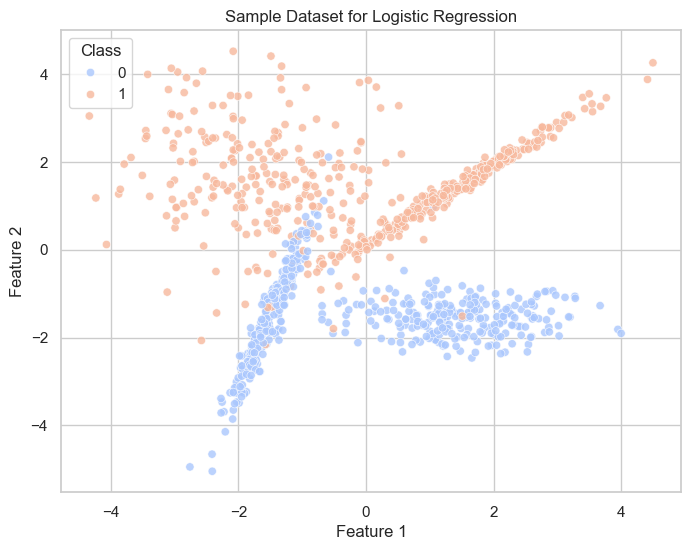

In [2]:
sns.set(style="whitegrid")

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, 
                           random_state=42, class_sep=1.5)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', alpha=0.8)
plt.title("Sample Dataset for Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Class")
plt.show()


## Understanding a plotting the sigmoid function

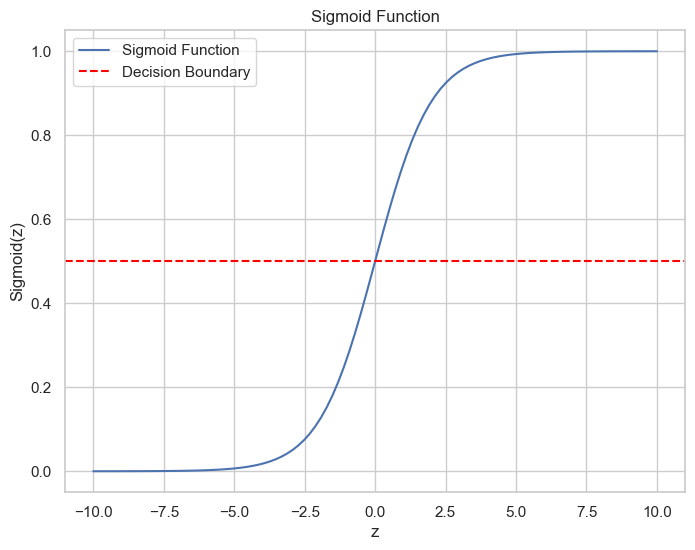

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot the sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label="Sigmoid Function")
plt.axhline(0.5, color="red", linestyle="--", label="Decision Boundary")
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.legend()
plt.show()


## Training a Logistic Regression Model



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Decision Boundary Visualization

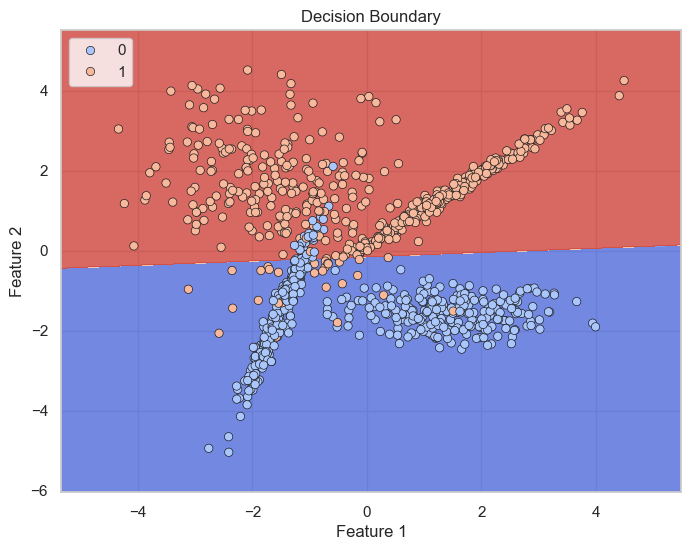

In [5]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, model)


## Regularization Techniques - Exploring L1,L2, ElasticNet

In [6]:
regularization_strengths = [0.1, 1, 10]
penalties = ['l1', 'l2', 'elasticnet']

for penalty in penalties:
    for C in regularization_strengths:
        if penalty == 'elasticnet':
            solver = 'saga'
            l1_ratio = 0.5  # Mixing parameter for ElasticNet
        else:
            solver = 'liblinear'
            l1_ratio = None

        try:
            model = LogisticRegression(penalty=penalty, C=C, solver=solver, l1_ratio=l1_ratio, max_iter=10000)
            model.fit(X_train, y_train)
            print(f"Regularization: {penalty}, Strength: {C}")
            print("Training Accuracy:", model.score(X_train, y_train))
            print("Testing Accuracy:", model.score(X_test, y_test))
            print("Feature Coefficients:", model.coef_)
            print()
        except ValueError as e:
            print(f"Error with {penalty} regularization: {e}")

Regularization: l1, Strength: 0.1
Training Accuracy: 0.93
Testing Accuracy: 0.955
Feature Coefficients: [[-0.0531121  2.2048646]]

Regularization: l1, Strength: 1
Training Accuracy: 0.93
Testing Accuracy: 0.96
Feature Coefficients: [[-0.12434486  2.4829192 ]]

Regularization: l1, Strength: 10
Training Accuracy: 0.93
Testing Accuracy: 0.96
Feature Coefficients: [[-0.13248631  2.51871452]]

Regularization: l2, Strength: 0.1
Training Accuracy: 0.9325
Testing Accuracy: 0.955
Feature Coefficients: [[-0.12233316  2.02197733]]

Regularization: l2, Strength: 1
Training Accuracy: 0.93
Testing Accuracy: 0.96
Feature Coefficients: [[-0.13285255  2.44231162]]

Regularization: l2, Strength: 10
Training Accuracy: 0.93
Testing Accuracy: 0.96
Feature Coefficients: [[-0.13321664  2.51348057]]

Regularization: elasticnet, Strength: 0.1
Training Accuracy: 0.93375
Testing Accuracy: 0.96
Feature Coefficients: [[-0.06902273  2.12089065]]

Regularization: elasticnet, Strength: 1
Training Accuracy: 0.93
Testi

## Convert dataset to DataFrame for EDA

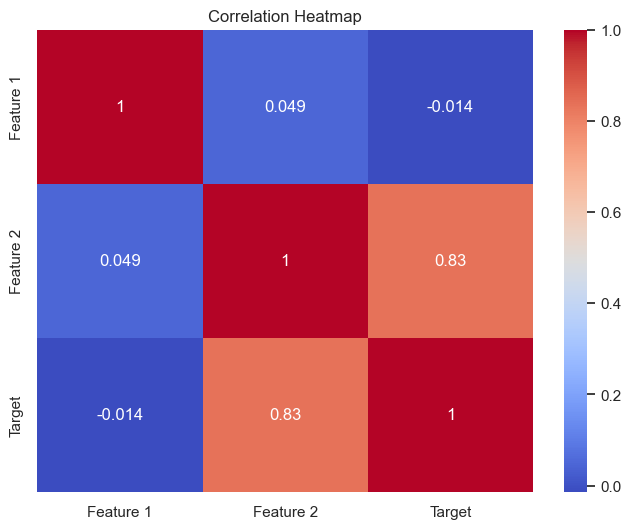

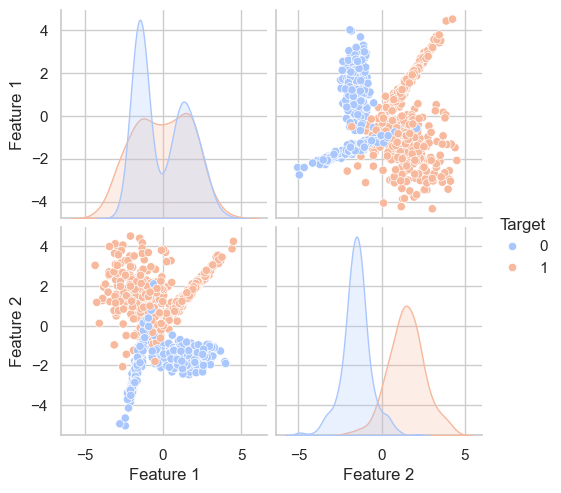

In [7]:
data = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
data['Target'] = y

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Pair Plot
sns.pairplot(data, hue='Target', palette='coolwarm')
plt.show()